In [2]:
import numpy as np

In [3]:
from scipy.interpolate import interp1d


def resize(X, length, axis=1):
    ''' Resize the temporal length using linear interpolation.
    X must be of shape (N,M,C) (channels last) or (N,C,M) (channels first),
    where N is the batch size, M is the temporal length, and C is the number
    of channels.
    If X is channels-last, use axis=1 (default).
    If X is channels-first, use axis=2.
    '''

    length_orig = X.shape[axis]
    t_orig = np.linspace(0, 1, length_orig, endpoint=True)
    t_new = np.linspace(0, 1, length, endpoint=True)
    X = interp1d(t_orig, X, kind='linear', axis=axis, assume_sorted=True)(t_new)

    return X

def getTenSec(start_idx, data):
    """
    Obtain ten second windows from data of shape: N x C x 30
    start_idx: the start idx of 10 sec epoch
    
    Output:
        epoch_data: 1 x 3 x 300
    """
    start_idx = 1
    end_idx = start_idx + 10

    win_x = data[start_idx:end_idx]

    my_x = win_x[:, 0, :]
    my_y = win_x[:, 1, :]
    my_z = win_x[:, 2, :]

    my_x = my_x.reshape(1, -1)
    my_y = my_y.reshape(1, -1)
    my_z = my_z.reshape(1, -1)
    epoch_data = np.concatenate((my_x, my_y, my_z))
    return epoch_data


data_root = '/Users/hangy/Desktop/recording/data/'
sample_data = data_root + 'shake_i.npy'
shake_i_x = np.load(sample_data)

shake_i_x = resize(shake_i_x, 30,axis=2)
print(shake_i_x.shape)

(110, 3, 30)


In [4]:
epcoh = getTenSec(10, shake_i_x)

In [5]:
epcoh.shape

(3, 300)

In [6]:
import matplotlib.pyplot as plt



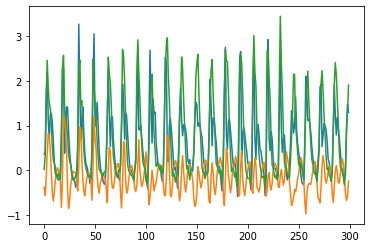

In [10]:
plt.plot(epcoh.T)